In [61]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('studentplacement_dataset(perceptron).csv')
df

,CGPA,Resume_Score,Placed
0,8.5,7.8,1
1,7.2,6.5,0
2,9.0,8.0,1
3,6.8,7.2,0
4,7.5,6.0,0
...,...,...,...
95,7.5,7.1,0
96,8.4,7.8,1
97,6.9,6.7,0
98,9.1,8.3,1


<Axes: xlabel='CGPA', ylabel='Resume_Score'>

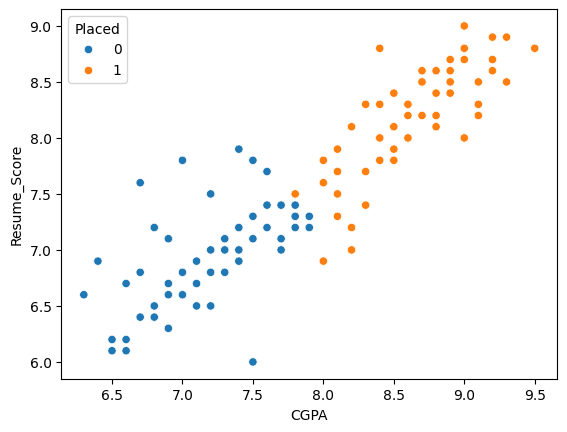

In [63]:
sns.scatterplot(data=df,x='CGPA',y='Resume_Score',hue='Placed')

In [64]:
x = df.iloc[:,0:2].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [65]:
'''creating perceptron function in which for each random row we are predicting output z if for that particular row
   actual prediction(y) is different than z than we are updating the weights '''

def Perceptron(x,y,epoch):
    x= np.insert(x,0,1,axis=1)  #inserts the value 1 at the 0th position along axis 1 (which refers to columns). 
    weights = (-50,-50,-50)     #This number has been choosen after certain  experimentation
    lr = 0.01
    epochs = epoch

    for i in range (epochs):
        j = np.random.randint(0,x.shape[0])
        z= np.dot(x[j],weights)
        if z>0:
            z = 1
        else:
            z=0

        weights = weights + lr*(y[j] - z)*x[j]

    return weights[0],weights[1:] 


In [66]:
intercept, coeff = Perceptron(x,y,10000)
slope = -(coeff[0]/coeff[1])
b = -(intercept/coeff[1])
print(slope,b)

-3.760720411663522 37.48713550600014


In [67]:
x_lim = np.linspace(6,10,200)
y_line = slope* x_lim + b


In [68]:
'''now based on weights that we got after training the model we are storing predicted values 
such that model has least errors'''
Z = []
for i in range(100):
    z = coeff[0] * x[i][0] + coeff[1] * x[i][1] + intercept
    if z > 0:
        z = 1
    else:
        z = 0
    Z.append(z)

y_hat = np.array(Z)   # Convert the list to a NumPy array with shape (100, 1)



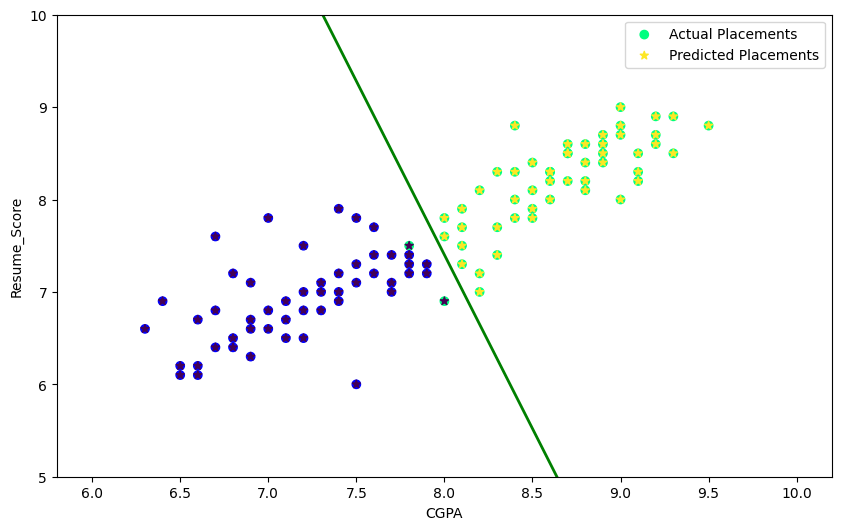

In [69]:
plt.figure(figsize=(10,6))
plt.plot(x_lim,y_line,color = 'Green',linewidth = 2)
plt.scatter(df['CGPA'], df['Resume_Score'], c= y, marker = 'o', cmap='winter',label ='Actual Placements')
plt.scatter(df['CGPA'], df['Resume_Score'], c= y_hat, marker = '*', label ='Predicted Placements')
plt.ylim(5,10)
plt.xlabel('CGPA')
plt.ylabel('Resume_Score')
plt.legend()
plt.show()

In [70]:
'''The issue with this code is randomly taking rows and making updates if your number of epochs is not correct it might happen 
that you will always get incorrect solution of line. Also as many times you run code line changes due to random selection of row.
Also this strategy doesnot gaurantee optimum solution of line that seperate the two regions.
We generally dont use this trick as it may happen that it performs extremely well on training data but might not work well on test data.'''

'The issue with this code is randomly taking rows and making updates if your number of epochs is not correct it might happen \nthat you will always get incorrect solution of line. Also as many times you run code line changes due to random selection of row.\nAlso this strategy doesnot gaurantee optimum solution of line that seperate the two regions.\nWe generally dont use this trick as it may happen that it performs extremely well on training data but might not work well on test data.'